In [44]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='canada3212', api_key='A32jrbpuxPfsMZKQIE3G')

In [3]:
df = pd.read_csv('mortgage.csv')

In [4]:
df = df.dropna()

In [5]:
df['default'] = df['default_time']

In [6]:
del df['default_time']

In [7]:
#split data between trainin and testing sets to maintain blind testing
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :22], df.iloc[:, 22], 
                                                    test_size = 0.2, random_state=42)

In [8]:
import imblearn.over_sampling

In [9]:
#ROS
ROS = imblearn.over_sampling.RandomOverSampler(\
                                               ratio={0:485727,1:12048*40}, \
                                               random_state=42) 


In [11]:
#transform data to new, more even ratio.
X_tr_ros, y_tr_ros = ROS.fit_sample(X_train, y_train)

In [13]:
#Smote Over Sample
smote = imblearn.over_sampling.SMOTE(\
                                               ratio={0:485727,1:12048*40}, \
                                               random_state=42) 
X_tr_smote, y_tr_smote = smote.fit_sample(X_train, y_train)

lr_smote = LogisticRegression() 

/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
lr_ros = LogisticRegression() 
lr_smote = LogisticRegression() 
lr_40x = LogisticRegression(class_weight={1 : 40, 0 : 1})
lr = LogisticRegression() 

In [18]:
lr.fit(X_train, y_train)
lr_ros.fit(X_tr_ros, y_tr_ros)
lr_smote.fit(X_tr_smote, y_tr_smote)
lr_40x.fit(X_train, y_train)

/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWa

LogisticRegression(C=1.0, class_weight={1: 40, 0: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [19]:
print(lr.precision_score(X_test, y_test))
print(lr_ros.precision_score(X_test, y_test))
print(lr_smote.precision_score(X_test, y_test))
print(lr_40x.precision_score(X_test, y_test))

AttributeError: 'LogisticRegression' object has no attribute 'precision_score'

In [27]:
#precision_score, recall_score, accuracy_score, roc_auc_score
print(precision_score(lr.predict(X_test), y_test))
print(precision_score(lr_ros.predict(X_test), y_test))
print(precision_score(lr_smote.predict(X_test), y_test))
print(precision_score(lr_40x.predict(X_test), y_test))

0.00032206119162640903
0.9993558776167472
0.9987117552334943
1.0


In [29]:
lr_precision = precision_score(lr.predict(X_test), y_test)
lr_ros_precision =precision_score(lr_ros.predict(X_test), y_test)
lr_smote_precision =precision_score(lr_smote.predict(X_test), y_test)
lr_40x_precision =precision_score(lr_40x.predict(X_test), y_test)

In [30]:
lr_recall = recall_score(lr.predict(X_test), y_test)
lr_ros_recall =recall_score(lr_ros.predict(X_test), y_test)
lr_smote_recall =recall_score(lr_smote.predict(X_test), y_test)
lr_40x_recall =recall_score(lr_40x.predict(X_test), y_test)

In [31]:
print(lr_recall)
print(lr_ros_recall)
print(lr_smote_recall)
print(lr_40x_recall)

0.058823529411764705
0.6895555555555556
0.48934827205302195
0.9980713596914176


In [32]:
lr_plot = [lr_precision, lr_recall]
lr_ros_plot = [lr_ros_precision, lr_ros_recall]
lr_smote_plot = [lr_smote_precision, lr_smote_recall]
lr_40x_plot = [lr_40x_precision, lr_40x_recall]

In [33]:
model_comparison = [lr_plot, lr_ros_plot, lr_smote_plot, lr_40x_plot]

In [58]:
df1 = pd.DataFrame(model_comparison)

In [59]:
df1.to_csv('model_metrics.csv')

In [40]:
x = [lr_recall, lr_ros_recall, lr_smote_recall, lr_40x_recall]
y = [lr_precision, lr_ros_precision, lr_smote_precision, lr_40x_precision]

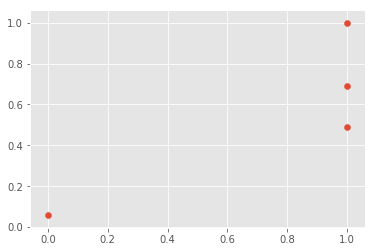

In [45]:
plt.scatter(y, x)

In [50]:
trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

In [52]:
data = [trace]

In [55]:
# py.iplot(data, filename='basic-scatter')

In [62]:
lr_40x_cm = confusion_matrix(y_test, lr_40x.predict(X_test))

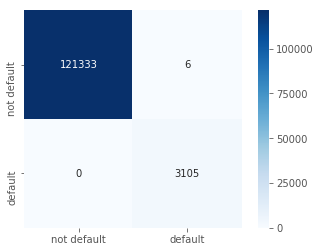

In [76]:
sns.heatmap(lr_40x_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd', xticklabels = ['not default','default'], yticklabels = ['not default', 'default'])

In [64]:
lr_cm= confusion_matrix(y_test, lr.predict(X_test))

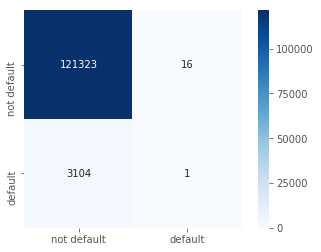

In [78]:
sns.heatmap(lr_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd', 
            xticklabels = ['not default','default'], yticklabels = ['not default', 'default'])